In [16]:
import numpy as np
import pandas as pd
from IPython.display import display

import mhcflurry as fl

from mhcflurry.downloads import get_path
from mhcflurry import Class1AffinityPredictor


In [18]:
#First load data

file_name = get_path("data_curated","curated_training_data.no_mass_spec.csv.bz2")
df = pd.read_csv(file_name)
print("There are %d Peptide-Allele measured values." % df.shape[0])
 

There are 234295 Peptide-Allele measured values.


In [19]:
display(df.head())

,allele,peptide,measurement_value,measurement_inequality,measurement_type,measurement_source,original_allele
0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101
1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101
2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801


In [20]:
#The algorith is designed to work with peptides from 8 to 15 aa. So filtering is needed
df = df.loc[(df.peptide.str.len() >7) & (df.peptide.str.len() < 16)]
print("There are %d Peptide-Allele measured values after filtering." % df.shape[0])

#Make a list of Alleles and the frecuencies 
alleleList = ((pd.DataFrame(np.transpose(np.unique(df.allele, return_counts = True)))))
alleleList.columns = ['Allele','Count']
#Choose alleles with more that 500 measured values
alleleList = alleleList[alleleList.Count >= 1000]
print("There are %d Alleles with more that 500 measured values." % alleleList.shape[0])

There are 233238 Peptide-Allele measured values after filtering.
There are 54 Alleles with more that 500 measured values.


In [21]:
results = np.zeros((2,100))
MSE = np.zeros((1,alleleList.shape[0]))
#dfATest has the Peptides that are NOT include in Training so we can use them for Test!!

#I use 900 for training out of 1000 so I can Test for 100
i=0
for m in alleleList['Allele']:
    Allele = m
    one_allele_td = df.loc[df.allele == Allele].sample(900)
    #fit the predictor with this data
    predictor = Class1AffinityPredictor()
    predictor.fit_allele_specific_predictors( n_models=1,
        architecture_hyperparameters_list=[{
        "layer_sizes": [300],
        "max_epochs": 100,
        "random_negative_constant": 1,
        }],
        peptides = one_allele_td.peptide.values,
        affinities = one_allele_td.measurement_value.values,
        allele=m)
    dfA = df.loc[df.allele == Allele].copy()
    dfATest = dfA[~dfA.peptide.isin(one_allele_td.peptide)].copy()
    display(i)
    for k in range(0,100):
        results[0][k] =dfATest.measurement_value.values[k]
        results[1][k] = predictor.predict([dfATest.peptide.values[k]],allele=m)

    MSE[0][i] = ((results[0]-results[1])**2).mean(axis=0) 
    i=i+1




[  900 peptides ]  Epoch   0 / 100: loss=1.85228. Min val loss (None) at epoch None


0

[  900 peptides ]  Epoch   0 / 100: loss=1.84141. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  96 / 100: loss=0.0427519. Min val loss (0.06331303715705872) at epoch 75


1

[  900 peptides ]  Epoch   0 / 100: loss=1.84905. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  92 / 100: loss=0.0444637. Min val loss (0.0546547994017601) at epoch 71


2

[  900 peptides ]  Epoch   0 / 100: loss=1.84074. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  91 / 100: loss=0.035716. Min val loss (0.043325357139110565) at epoch 70


3

[  900 peptides ]  Epoch   0 / 100: loss=1.81717. Min val loss (None) at epoch None


4

[  900 peptides ]  Epoch   0 / 100: loss=1.82679. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  80 / 100: loss=0.0470209. Min val loss (0.06675626337528229) at epoch 59


5

[  900 peptides ]  Epoch   0 / 100: loss=1.86174. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  72 / 100: loss=0.0463851. Min val loss (0.06200426071882248) at epoch 51


6

[  900 peptides ]  Epoch   0 / 100: loss=1.83416. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  70 / 100: loss=0.0544153. Min val loss (0.06857652962207794) at epoch 49


7

[  900 peptides ]  Epoch   0 / 100: loss=1.87615. Min val loss (None) at epoch None


8

[  900 peptides ]  Epoch   0 / 100: loss=1.86285. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  96 / 100: loss=0.037331. Min val loss (0.05990808457136154) at epoch 75


9

[  900 peptides ]  Epoch   0 / 100: loss=1.85159. Min val loss (None) at epoch None


10

[  900 peptides ]  Epoch   0 / 100: loss=1.85063. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  73 / 100: loss=0.0383955. Min val loss (0.05264127999544144) at epoch 52


11

[  900 peptides ]  Epoch   0 / 100: loss=1.81922. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  89 / 100: loss=0.0421585. Min val loss (0.052471645176410675) at epoch 68


12

[  900 peptides ]  Epoch   0 / 100: loss=1.82373. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  76 / 100: loss=0.0400823. Min val loss (0.05897773057222366) at epoch 55


13

[  900 peptides ]  Epoch   0 / 100: loss=1.81837. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  55 / 100: loss=0.0488352. Min val loss (0.04354090243577957) at epoch 34


14

[  900 peptides ]  Epoch   0 / 100: loss=1.86622. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  87 / 100: loss=0.0323783. Min val loss (0.04913947731256485) at epoch 84


15

[  900 peptides ]  Epoch   0 / 100: loss=1.82129. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  66 / 100: loss=0.0365103. Min val loss (0.044013120234012604) at epoch 45


16

[  900 peptides ]  Epoch   0 / 100: loss=1.85331. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  84 / 100: loss=0.0450034. Min val loss (0.05629328638315201) at epoch 63


17

[  900 peptides ]  Epoch   0 / 100: loss=1.80667. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  71 / 100: loss=0.043012. Min val loss (0.05284168943762779) at epoch 50


18

[  900 peptides ]  Epoch   0 / 100: loss=1.84447. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  68 / 100: loss=0.0478249. Min val loss (0.0694306343793869) at epoch 47


19

[  900 peptides ]  Epoch   0 / 100: loss=1.79692. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  72 / 100: loss=0.0432. Min val loss (0.049108296632766724) at epoch 71
[  900 peptides ]  Stopping at epoch  92 / 100: loss=0.0407455. Min val loss (0.049108296632766724) at epoch 71


20

[  900 peptides ]  Epoch   0 / 100: loss=1.87236. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  79 / 100: loss=0.0507605. Min val loss (0.06060591712594032) at epoch 58


21

[  900 peptides ]  Epoch   0 / 100: loss=1.85252. Min val loss (None) at epoch None


22

[  900 peptides ]  Epoch   0 / 100: loss=1.84391. Min val loss (None) at epoch None


23

[  900 peptides ]  Epoch   0 / 100: loss=1.82565. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  82 / 100: loss=0.0397717. Min val loss (0.048397623002529144) at epoch 61


24

[  900 peptides ]  Epoch   0 / 100: loss=1.8141. Min val loss (None) at epoch None


25

[  900 peptides ]  Epoch   0 / 100: loss=1.8201. Min val loss (None) at epoch None


26

[  900 peptides ]  Epoch   0 / 100: loss=1.83887. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  81 / 100: loss=0.0413589. Min val loss (0.04440499097108841) at epoch 73


27

[  900 peptides ]  Epoch   0 / 100: loss=1.84419. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  60 / 100: loss=0.0414991. Min val loss (0.042369741946458817) at epoch 39


28

[  900 peptides ]  Epoch   0 / 100: loss=1.81943. Min val loss (None) at epoch None


29

[  900 peptides ]  Epoch   0 / 100: loss=1.80478. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  99 / 100: loss=0.0369216. Min val loss (0.046692296862602234) at epoch 78


30

[  900 peptides ]  Epoch   0 / 100: loss=1.86678. Min val loss (None) at epoch None


31

[  900 peptides ]  Epoch   0 / 100: loss=1.81463. Min val loss (None) at epoch None


32

[  900 peptides ]  Epoch   0 / 100: loss=1.81809. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  96 / 100: loss=0.0325408. Min val loss (0.04053938388824463) at epoch 78
[  900 peptides ]  Stopping at epoch  99 / 100: loss=0.0316222. Min val loss (0.04053938388824463) at epoch 78


33

[  900 peptides ]  Epoch   0 / 100: loss=1.83468. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  77 / 100: loss=0.0461079. Min val loss (0.057092439383268356) at epoch 56


34

[  900 peptides ]  Epoch   0 / 100: loss=1.86017. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  88 / 100: loss=0.0295549. Min val loss (0.04662270098924637) at epoch 67


35

[  900 peptides ]  Epoch   0 / 100: loss=1.81564. Min val loss (None) at epoch None


36

[  900 peptides ]  Epoch   0 / 100: loss=1.83588. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  89 / 100: loss=0.0377822. Min val loss (0.041986849159002304) at epoch 68


37

[  900 peptides ]  Epoch   0 / 100: loss=1.8634. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  62 / 100: loss=0.0340046. Min val loss (0.049107931554317474) at epoch 41


38

[  900 peptides ]  Epoch   0 / 100: loss=1.84144. Min val loss (None) at epoch None


39

[  900 peptides ]  Epoch   0 / 100: loss=1.8483. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  95 / 100: loss=0.031473. Min val loss (0.0377328097820282) at epoch 74


40

[  900 peptides ]  Epoch   0 / 100: loss=1.82955. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  91 / 100: loss=0.0252648. Min val loss (0.02848147228360176) at epoch 70


41

[  900 peptides ]  Epoch   0 / 100: loss=1.81318. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  81 / 100: loss=0.0334371. Min val loss (0.035969220101833344) at epoch 60


42

[  900 peptides ]  Epoch   0 / 100: loss=1.86001. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  97 / 100: loss=0.0409694. Min val loss (0.04557567834854126) at epoch 93


43

[  900 peptides ]  Epoch   0 / 100: loss=1.83856. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  78 / 100: loss=0.0358759. Min val loss (0.044843003153800964) at epoch 57


44

[  900 peptides ]  Epoch   0 / 100: loss=1.82149. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  86 / 100: loss=0.0298253. Min val loss (0.038384631276130676) at epoch 68
[  900 peptides ]  Stopping at epoch  89 / 100: loss=0.0305512. Min val loss (0.038384631276130676) at epoch 68


45

[  900 peptides ]  Epoch   0 / 100: loss=1.82977. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  87 / 100: loss=0.0341772. Min val loss (0.04006466269493103) at epoch 66


46

[  900 peptides ]  Epoch   0 / 100: loss=1.83584. Min val loss (None) at epoch None


47

[  900 peptides ]  Epoch   0 / 100: loss=1.86876. Min val loss (None) at epoch None


48

[  900 peptides ]  Epoch   0 / 100: loss=1.83702. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  66 / 100: loss=0.0467964. Min val loss (0.06814225763082504) at epoch 45


49

[  900 peptides ]  Epoch   0 / 100: loss=1.85028. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  97 / 100: loss=0.0332286. Min val loss (0.04068990424275398) at epoch 89


50

[  900 peptides ]  Epoch   0 / 100: loss=1.83504. Min val loss (None) at epoch None
[  900 peptides ]  Stopping at epoch  65 / 100: loss=0.0353715. Min val loss (0.04065683111548424) at epoch 44


51

[  900 peptides ]  Epoch   0 / 100: loss=1.8283. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  96 / 100: loss=0.0328033. Min val loss (0.04240260645747185) at epoch 87


52

[  900 peptides ]  Epoch   0 / 100: loss=1.85635. Min val loss (None) at epoch None
[  900 peptides ]  Epoch  97 / 100: loss=0.0331602. Min val loss (0.04477570205926895) at epoch 84


53

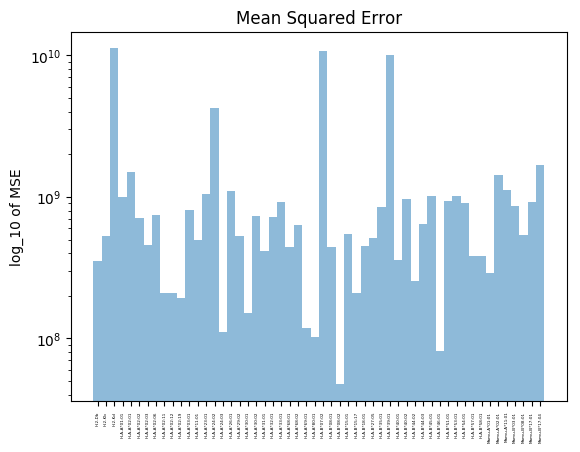

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = alleleList.Allele
y_pos = np.arange(len(objects))

plt.bar(y_pos,MSE[0],align='center',alpha = 0.5,width=1,log=True)
plt.xticks(y_pos, objects,rotation=90,fontsize=3)
plt.ylabel('log_10 of MSE')
plt.title('Mean Squared Error')

plt.show()